In [ ]:
# import os
# import sys
# import json
# import datetime
# import numpy as np
# import skimage.draw
# import matplotlib.pyplot as plt

# # Root directory của project
# ROOT_DIR = os.path.abspath("../../")

# # Import Mask RCNN
# sys.path.append(ROOT_DIR)  # To find the local version of the library
# from mrcnn import utils
# from mrcnn import visualize
# # from mrcnn import model as modellib  # Import `modellib` correctly
# from tensorflow import keras
# from tensorflow.keras import backend as K
# from tensorflow.keras import layers as KL
# from tensorflow.keras import models as KM
# from tensorflow.keras import utils as KE
# from mrcnn.config import Config

# # Dataset directory
# DATASET_DIR = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/balloon/train"

# # Path tới weights đã huấn luyện trước
# COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

# # Configuration cho bài toán
# class BalloonConfig(Config):
#     NAME = "balloon"
#     IMAGES_PER_GPU = 2
#     NUM_CLASSES = 1 + 1  # Background + balloon
#     STEPS_PER_EPOCH = 100
#     DETECTION_MIN_CONFIDENCE = 0.9

# # Dataset cho việc huấn luyện
# class BalloonDataset(utils.Dataset):
#     def load_balloon(self, dataset_dir, subset):
#         self.add_class("balloon", 1, "balloon")
#         assert subset in ["train", "val"]
#         dataset_dir = os.path.join(dataset_dir, subset)
#         annotations = json.load(open(os.path.join(dataset_dir, "via_region_data.json")))
#         annotations = list(annotations.values())  # Don't need the dict keys
#         annotations = [a for a in annotations if a['regions']]

#         for a in annotations:
#             polygons = [r['shape_attributes'] for r in a['regions']]
#             image_path = os.path.join(dataset_dir, a['filename'])
#             image = skimage.io.imread(image_path)
#             height, width = image.shape[:2]
#             self.add_image("balloon", image_id=a['filename'], path=image_path,
#                            width=width, height=height, polygons=polygons)

#     def load_mask(self, image_id):
#         image_info = self.image_info[image_id]
#         if image_info["source"] != "balloon":
#             return super(self.__class__, self).load_mask(image_id)
#         info = self.image_info[image_id]
#         mask = np.zeros([info["height"], info["width"], len(info["polygons"])], dtype=np.uint8)
#         for i, p in enumerate(info["polygons"]):
#             rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
#             mask[rr, cc, i] = 1
#         return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

#     def image_reference(self, image_id):
#         info = self.image_info[image_id]
#         if info["source"] == "balloon":
#             return info["path"]
#         else:
#             super(self.__class__, self).image_reference(image_id)

# # Huấn luyện model
# def train(model):
#     dataset_train = BalloonDataset()
#     dataset_train.load_balloon(DATASET_DIR, "train")
#     dataset_train.prepare()

#     dataset_val = BalloonDataset()
#     dataset_val.load_balloon(DATASET_DIR, "val")
#     dataset_val.prepare()

#     print("Training network heads")
#     model.train(dataset_train, dataset_val, learning_rate=config.LEARNING_RATE, epochs=30, layers='heads')

# # Dự đoán và tạo mặt nạ
# def detect_and_color_splash(model, image_path):
#     image = skimage.io.imread(image_path)
#     r = model.detect([image], verbose=1)[0]
#     splash = visualize.apply_mask(image, r['masks'], color=(255, 0, 0))
#     plt.figure(figsize=(12, 8))
#     plt.imshow(splash)
#     plt.show()

# # if __name__ == '__main__':
# #     import argparse

# #     parser = argparse.ArgumentParser(description='Train Mask R-CNN to detect balloons.')
# #     parser.add_argument("command", metavar="<command>", help="'train' or 'splash'")
# #     parser.add_argument('--dataset', required=False, metavar="/path/to/balloon/dataset/", help='Directory of the Balloon dataset')
# #     parser.add_argument('--weights', required=True, metavar="/path/to/weights.h5", help="Path to weights .h5 file or 'coco'")
# #     parser.add_argument('--logs', required=False, default=DEFAULT_LOGS_DIR, metavar="/path/to/logs/", help='Logs and checkpoints directory (default=logs/)')
# #     parser.add_argument('--image', required=False, metavar="path or URL to image", help='Image to apply the color splash effect on')
# #     parser.add_argument('--video', required=False, metavar="path or URL to video", help='Video to apply the color splash effect on')

#     if __name__ == '__main__':
#       # Instead of using argparse, set the arguments directly:
#       args = type('', (), {})()  # Create an empty object to hold arguments
#       args.command = "train"  # Set to "train" or "splash"
#       args.dataset = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/balloon/train"  # Path to your dataset
#       args.weights = "coco"  # Or path to your weights file
#       args.logs = DEFAULT_LOGS_DIR
#       args = parser.parse_args()

#     if args.command == "train":
#         config = BalloonConfig()
#     else:
#         class InferenceConfig(BalloonConfig):
#             GPU_COUNT = 1
#             IMAGES_PER_GPU = 1
#         config = InferenceConfig()
#     config.display()

#     if args.command == "train":
#         model = modellib.MaskRCNN(mode="training", config=config, model_dir=args.logs)
#     else:
#         model = modellib.MaskRCNN(mode="inference", config=config, model_dir=args.logs)

#     if args.weights.lower() == "coco":
#         weights_path = COCO_WEIGHTS_PATH
#         if not os.path.exists(weights_path):
#             utils.download_trained_weights(weights_path)
#     elif args.weights.lower() == "last":
#         weights_path = model.find_last()
#     elif args.weights.lower() == "imagenet":
#         weights_path = model.get_imagenet_weights()
#     else:
#         weights_path = args.weights

#     print("Loading weights ", weights_path)
#     model.load_weights(weights_path, by_name=True)

#     if args.command == "train":
#         train(model)
#     elif args.command == "splash":
#         detect_and_color_splash(model, image_path=args.image)
#     else:
#         print("'{}' is not recognized. Use 'train' or 'splash'".format(args.command))


In [ ]:
pip install torch torchvision pillow numpy opencv-python matplotlib

In [ ]:
# Cài đặt các thư viện cần thiết
import os
import sys
import random
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from PIL import Image

# [Rest of the code remains the same...]
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transforms=None):
        self.root_dir = root_dir
        self.transforms = transforms
        # Giả sử cấu trúc thư mục: root_dir/images và root_dir/annotations
        self.imgs_dir = os.path.join(root_dir, "images") # images nam trong thu muc dataset
        self.masks_dir = os.path.join(root_dir, "annotations") # annotations nam trong thu muc dataset
        self.imgs = list(sorted(os.listdir(self.imgs_dir)))
        self.masks = list(sorted(os.listdir(self.masks_dir)))

    def __getitem__(self, idx):
        # Load ảnh
        img_path = os.path.join(self.imgs_dir, self.imgs[idx])
        mask_path = os.path.join(self.masks_dir, self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path)

        # Chuyển mask thành numpy array
        mask = np.array(mask)

        # Nếu mask có nhiều channels, lấy channel đầu tiên
        if len(mask.shape) == 3:
            mask = mask[:,:,0]  # Lấy channel đầu tiên

        # Lấy instances khác nhau
        obj_ids = np.unique(mask)
        # Loại bỏ background (giả sử là 0)
        obj_ids = obj_ids[1:]

        # Tách các mask cho từng instance
        masks = np.array([mask == obj_id for obj_id in obj_ids])

        # Lấy bounding boxes
        num_objs = len(obj_ids)
        boxes = []
        valid_masks = []
        valid_obj_ids = []

        for i in range(num_objs):
            pos = np.where(masks[i])
            if len(pos[0]) > 0:  # Kiểm tra xem mask có rỗng không
                xmin = np.min(pos[1])
                xmax = np.max(pos[1])
                ymin = np.min(pos[0])
                ymax = np.max(pos[0])

                # Kiểm tra xem box có kích thước hợp lệ không
                if (xmax > xmin) and (ymax > ymin):
                    boxes.append([xmin, ymin, xmax, ymax])
                    valid_masks.append(masks[i])
                    valid_obj_ids.append(obj_ids[i])

        # Cập nhật số lượng objects hợp lệ
        num_objs = len(boxes)
        masks = np.array(valid_masks) if valid_masks else np.zeros((0, mask.shape[0], mask.shape[1]))

        # Chuyển đổi sang tensor
        if num_objs > 0:
            boxes = torch.as_tensor(boxes, dtype=torch.float32)
            labels = torch.ones((num_objs,), dtype=torch.int64)
            masks = torch.as_tensor(masks, dtype=torch.uint8)

            image_id = torch.tensor([idx])
            area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
            iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        else:
            # Trường hợp không có object nào hợp lệ
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)
            masks = torch.zeros((0, mask.shape[0], mask.shape[1]), dtype=torch.uint8)
            image_id = torch.tensor([idx])
            area = torch.zeros((0,), dtype=torch.float32)
            iscrowd = torch.zeros((0,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

def get_transform():
    transforms = []
    # Chuyển đổi sang tensor
    transforms.append(lambda x, target: (F.to_tensor(x), target))
    return Compose(transforms)

class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

def train_model():
    # Khởi tạo model
    model = maskrcnn_resnet50_fpn(pretrained=True)

    # Thay đổi số lượng classes (ví dụ: background + 1 class)
    num_classes = 2
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Thay đổi mask predictor
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                      hidden_layer,
                                                      num_classes)

    # Chuẩn bị dataset
    dataset = CustomDataset('/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset', get_transform()) # de duong dan co dataset chua 2 thu muc images va annotations
    data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

    # Chuyển model sang GPU nếu có
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)

    # Khởi tạo optimizer
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=0.005,
                               momentum=0.9, weight_decay=0.0005)

    # Training loop
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for images, targets in data_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())

            optimizer.zero_grad()
            losses.backward()
            optimizer.step()

            epoch_loss += losses.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(data_loader)}")

    return model

def collate_fn(batch):
    return tuple(zip(*batch))

# Hàm để thực hiện dự đoán trên ảnh mới
def predict(model, image_path, device):
    model.eval()
    img = Image.open(image_path).convert("RGB")
    transform = get_transform()
    img, _ = transform(img, None)
    img = img.to(device)

    with torch.no_grad():
        prediction = model([img])

    return prediction

if __name__ == "__main__":
    # Huấn luyện model
    model = train_model()

    # Lưu model
    torch.save(model.state_dict(), '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/mask_rcnn_model.pth') #Luu model o thu muc tren Google Drive cua ban

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 1.6086236983537674
Epoch 2/10, Loss: 0.7781330943107605
Epoch 3/10, Loss: 0.6126003712415695
Epoch 4/10, Loss: 0.414537213742733
Epoch 5/10, Loss: 0.35130106657743454
Epoch 6/10, Loss: 0.2829551175236702
Epoch 7/10, Loss: 0.2662038020789623
Epoch 8/10, Loss: 0.22713648155331612
Epoch 9/10, Loss: 0.2195602022111416
Epoch 10/10, Loss: 0.20767347514629364


In [ ]:
import torch
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.transforms import functional as F

def get_transform():
    return lambda x: F.to_tensor(x)

def get_model_instance_segmentation(num_classes):
    # Tạo model giống như lúc training
    model = maskrcnn_resnet50_fpn(pretrained=True)

    # Cập nhật số classes cho box predictor
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Cập nhật số classes cho mask predictor
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                      hidden_layer,
                                                      num_classes)
    return model

def test_dataset_images(model_path, images_dir, output_dir):
    # Tạo thư mục output
    os.makedirs(output_dir, exist_ok=True)

    # Thiết lập device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Sử dụng device: {device}")

    # Tải model
    model = get_model_instance_segmentation(num_classes=2)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()
    print("Đã tải model thành công")

    # Chuẩn bị transform
    transform = get_transform()

    # Lấy danh sách ảnh
    images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
    print(f"Tìm thấy {len(images)} ảnh để test")

    # Xử lý từng ảnh
    for img_name in images:
        print(f"\nĐang xử lý ảnh: {img_name}")
        img_path = os.path.join(images_dir, img_name)

        # Đọc và transform ảnh
        image = Image.open(img_path).convert("RGB")
        image_tensor = transform(image)

        # Dự đoán
        with torch.no_grad():
            prediction = model([image_tensor.to(device)])

        # Lấy kết quả
        boxes = prediction[0]['boxes'].cpu()
        scores = prediction[0]['scores'].cpu()
        masks = prediction[0]['masks'].cpu()

        # Lọc prediction có độ tin cậy cao
        confidence_threshold = 0.5
        high_conf_indices = scores > confidence_threshold
        boxes = boxes[high_conf_indices]
        scores = scores[high_conf_indices]
        masks = masks[high_conf_indices]

        # Vẽ kết quả
        plt.figure(figsize=(20, 10))

        # Ảnh gốc
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title('Ảnh gốc', fontsize=13)
        plt.axis('off')

        # Ảnh với predictions
        plt.subplot(1, 2, 2)
        image_np = np.array(image)
        plt.imshow(image_np)

        detected_objects = len(boxes)
        plt.title(f'Dự đoán (Phát hiện {detected_objects} đối tượng)', fontsize=13)

        # Vẽ boxes và masks
        for box, mask, score in zip(boxes, masks, scores):
            box = box.numpy()
            # Vẽ box
            plt.gca().add_patch(plt.Rectangle(
                (box[0], box[1]),
                box[2] - box[0],
                box[3] - box[1],
                fill=False,
                color='red',
                linewidth=2
            ))

            # Vẽ mask
            mask = mask.squeeze().numpy() > 0.5
            masked_image = image_np.copy()
            masked_image[mask] = masked_image[mask] * 0.7 + np.array([0, 255, 0]) * 0.3
            plt.imshow(masked_image, alpha=0.5)

            # Hiển thị score
            plt.text(
                box[0], box[1] - 5,
                f'Score: {score:.2f}',
                color='white',
                bbox=dict(facecolor='red', alpha=0.7),
                fontsize=10
            )

        plt.axis('off')

        # Lưu kết quả
        output_path = os.path.join(output_dir, f'result_{img_name}')
        plt.savefig(output_path, bbox_inches='tight', dpi=200)
        plt.close()

        print(f"Đã phát hiện {detected_objects} đối tượng trong ảnh {img_name}")

# Đường dẫn
model_path = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/mask_rcnn_model.pth" # Duong dan luu model da train xong
images_dir = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images" # thu muc images chua 7 anh de test model
output_dir = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/test_results" # thu muc test_results chua ket qua thu nghiem cua Mask R-CNN

# Chạy test
test_dataset_images(model_path, images_dir, output_dir)

Sử dụng device: cpu


<ipython-input-5-26ae35995bf8>:292: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


Đã tải model thành công
Tìm thấy 7 ảnh để test

Đang xử lý ảnh: 2516944023_d00345997d_z.jpg
Đã phát hiện 8 đối tượng trong ảnh 2516944023_d00345997d_z.jpg

Đang xử lý ảnh: 1045023827_4ec3e8ba5c_z.jpg
Đã phát hiện 5 đối tượng trong ảnh 1045023827_4ec3e8ba5c_z.jpg

Đang xử lý ảnh: 12283150_12d37e6389_z.jpg
Đã phát hiện 6 đối tượng trong ảnh 12283150_12d37e6389_z.jpg

Đang xử lý ảnh: 262985539_1709e54576_z.jpg
Đã phát hiện 6 đối tượng trong ảnh 262985539_1709e54576_z.jpg

Đang xử lý ảnh: 2383514521_1fc8d7b0de_z.jpg
Đã phát hiện 5 đối tượng trong ảnh 2383514521_1fc8d7b0de_z.jpg

Đang xử lý ảnh: 2502287818_41e4b0c4fb_z.jpg
Đã phát hiện 7 đối tượng trong ảnh 2502287818_41e4b0c4fb_z.jpg

Đang xử lý ảnh: 25691390_f9944f61b5_z.jpg
Đã phát hiện 6 đối tượng trong ảnh 25691390_f9944f61b5_z.jpg


+ Score trong hình dự đoán của Mask R-CNN biểu thị độ tin cậy của mô hình về việc phát hiện đối tượng. Đây là xác suất (hoặc confidence) mà mô hình gán cho việc phát hiện một đối tượng cụ thể trong vùng được bao bởi bounding box.

+ Ý nghĩa cụ thể:
  - Score cao (gần 1.0): Mô hình rất chắc chắn rằng đối tượng được phát hiện là đúng.
  - Score thấp: Mô hình ít tự tin về dự đoán, có thể là do vật thể khó nhận diện, bị che khuất hoặc không đủ dữ liệu huấn luyện.
+ Khi đánh giá kết quả, bạn thường chọn một ngưỡng score để loại bỏ các phát hiện không chắc chắn (ví dụ: chỉ giữ lại các box với score > 0.5).

In [ ]:
# # Cài đặt các thư viện cần thiết
# import os
# import sys
# import random
# import math
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import json
# import torch
# import torchvision
# from torchvision.models.detection import maskrcnn_resnet50_fpn
# from torchvision.transforms import functional as F
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
# from PIL import Image

# # [Rest of the code remains the same...]
# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, root_dir, transforms=None):
#         self.root_dir = root_dir
#         self.transforms = transforms

#         # Kiểm tra tồn tại của thư mục
#         self.imgs_dir = os.path.join(root_dir, "images_02")
#         self.masks_dir = os.path.join(root_dir, "annotations_02")

#         if not os.path.exists(self.imgs_dir):
#             raise ValueError(f"Image directory not found: {self.imgs_dir}")
#         if not os.path.exists(self.masks_dir):
#             raise ValueError(f"Mask directory not found: {self.masks_dir}")

#         # Lấy danh sách files
#         self.imgs = list(sorted(os.listdir(self.imgs_dir)))
#         self.masks = list(sorted(os.listdir(self.masks_dir)))

#         # Debug info
#         print(f"Number of images: {len(self.imgs)}")
#         print(f"Number of masks: {len(self.masks)}")

#         if len(self.imgs) == 0:
#             raise ValueError(f"No images found in {self.imgs_dir}")
#         if len(self.masks) == 0:
#             raise ValueError(f"No masks found in {self.masks_dir}")

#         # Kiểm tra matching giữa images và masks
#         if len(self.imgs) != len(self.masks):
#             print("Warning: Number of images and masks don't match!")
#             print("Image files:", self.imgs)
#             print("Mask files:", self.masks)

#             # Lọc ra các cặp matching
#             matching_pairs = []
#             for img_name in self.imgs:
#                 # Tìm mask tương ứng (điều chỉnh logic này theo naming convention của bạn)
#                 mask_name = img_name.replace('.jpg', '.png')  # hoặc format phù hợp
#                 if mask_name in self.masks:
#                     matching_pairs.append((img_name, mask_name))

#             if len(matching_pairs) == 0:
#                 raise ValueError("No matching image-mask pairs found!")

#             # Cập nhật danh sách files
#             self.imgs = [pair[0] for pair in matching_pairs]
#             self.masks = [pair[1] for pair in matching_pairs]
#             print(f"Found {len(matching_pairs)} matching pairs")

#     def __getitem__(self, idx):
#         try:
#             # Load ảnh
#             img_path = os.path.join(self.imgs_dir, self.imgs[idx])
#             mask_path = os.path.join(self.masks_dir, self.masks[idx])

#             print(f"Loading image: {img_path}")
#             print(f"Loading mask: {mask_path}")

#             if not os.path.exists(img_path):
#                 raise FileNotFoundError(f"Image file not found: {img_path}")
#             if not os.path.exists(mask_path):
#                 raise FileNotFoundError(f"Mask file not found: {mask_path}")

#             img = Image.open(img_path).convert("RGB")
#             mask = Image.open(mask_path)

#             # Chuyển mask thành numpy array
#             mask = np.array(mask)

#             # Debug mask info
#             print(f"Mask shape: {mask.shape}")
#             print(f"Unique values in mask: {np.unique(mask)}")

#             # Nếu mask có nhiều channels, lấy channel đầu tiên
#             if len(mask.shape) == 3:
#                 mask = mask[:,:,0]

#             # Lấy instances khác nhau
#             obj_ids = np.unique(mask)
#             obj_ids = obj_ids[1:]

#             # Tách các mask cho từng instance
#             masks = np.array([mask == obj_id for obj_id in obj_ids])

#             # Lấy bounding boxes
#             num_objs = len(obj_ids)
#             boxes = []
#             valid_masks = []
#             valid_obj_ids = []

#             for i in range(num_objs):
#                 pos = np.where(masks[i])
#                 if len(pos[0]) > 0:
#                     xmin = np.min(pos[1])
#                     xmax = np.max(pos[1])
#                     ymin = np.min(pos[0])
#                     ymax = np.max(pos[0])

#                     if (xmax > xmin) and (ymax > ymin):
#                         boxes.append([xmin, ymin, xmax, ymax])
#                         valid_masks.append(masks[i])
#                         valid_obj_ids.append(obj_ids[i])

#             # Cập nhật số lượng objects hợp lệ
#             num_objs = len(boxes)
#             masks = np.array(valid_masks) if valid_masks else np.zeros((0, mask.shape[0], mask.shape[1]))

#             # Chuyển đổi sang tensor
#             if num_objs > 0:
#                 boxes = torch.as_tensor(boxes, dtype=torch.float32)
#                 labels = torch.ones((num_objs,), dtype=torch.int64)
#                 masks = torch.as_tensor(masks, dtype=torch.uint8)

#                 image_id = torch.tensor([idx])
#                 area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
#                 iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
#             else:
#                 boxes = torch.zeros((0, 4), dtype=torch.float32)
#                 labels = torch.zeros((0,), dtype=torch.int64)
#                 masks = torch.zeros((0, mask.shape[0], mask.shape[1]), dtype=torch.uint8)
#                 image_id = torch.tensor([idx])
#                 area = torch.zeros((0,), dtype=torch.float32)
#                 iscrowd = torch.zeros((0,), dtype=torch.int64)

#             target = {}
#             target["boxes"] = boxes
#             target["labels"] = labels
#             target["masks"] = masks
#             target["image_id"] = image_id
#             target["area"] = area
#             target["iscrowd"] = iscrowd

#             if self.transforms is not None:
#                 img, target = self.transforms(img, target)

#             return img, target

#         except Exception as e:
#             print(f"Error processing index {idx}")
#             print(f"Image file: {self.imgs[idx] if idx < len(self.imgs) else 'index out of range'}")
#             print(f"Mask file: {self.masks[idx] if idx < len(self.masks) else 'index out of range'}")
#             raise e

#     def __len__(self):
#         return len(self.imgs)

# def get_transform():
#     transforms = []
#     # Chuyển đổi sang tensor
#     transforms.append(lambda x, target: (F.to_tensor(x), target))
#     return Compose(transforms)

# class Compose:
#     def __init__(self, transforms):
#         self.transforms = transforms

#     def __call__(self, image, target):
#         for t in self.transforms:
#             image, target = t(image, target)
#         return image, target

# def train_model():
#     # Khởi tạo model
#     model = maskrcnn_resnet50_fpn(pretrained=True)

#     # Thay đổi số lượng classes (ví dụ: background + 1 class)
#     num_classes = 2
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

#     # Thay đổi mask predictor
#     in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
#     hidden_layer = 256
#     model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
#                                                       hidden_layer,
#                                                       num_classes)

#     # Chuẩn bị dataset
#     dataset = CustomDataset('/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset', get_transform())
#     data_loader = torch.utils.data.DataLoader(
#         dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

#     # Chuyển model sang GPU nếu có
#     device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#     model.to(device)

#     # Khởi tạo optimizer
#     params = [p for p in model.parameters() if p.requires_grad]
#     optimizer = torch.optim.SGD(params, lr=0.005,
#                                momentum=0.9, weight_decay=0.0005)

#     # Training loop
#     num_epochs = 10
#     for epoch in range(num_epochs):
#         model.train()
#         epoch_loss = 0
#         for images, targets in data_loader:
#             images = list(image.to(device) for image in images)
#             targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

#             loss_dict = model(images, targets)
#             losses = sum(loss for loss in loss_dict.values())

#             optimizer.zero_grad()
#             losses.backward()
#             optimizer.step()

#             epoch_loss += losses.item()

#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(data_loader)}")

#     return model

# def collate_fn(batch):
#     return tuple(zip(*batch))

# # Hàm để thực hiện dự đoán trên ảnh mới
# def predict(model, image_path, device):
#     model.eval()
#     img = Image.open(image_path).convert("RGB")
#     transform = get_transform()
#     img, _ = transform(img, None)
#     img = img.to(device)

#     with torch.no_grad():
#         prediction = model([img])

#     return prediction

# if __name__ == "__main__":
#     # Huấn luyện model
#     model = train_model()

#     # Lưu model
#     torch.save(model.state_dict(), '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/mask_rcnn_model.pth')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Number of images: 5
Number of masks: 5
Loading image: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/25691390_f9944f61b5_z.jpg
Loading mask: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/annotations_02/25691390_f9944f61b5_z.jpg
Mask shape: (739, 906, 4)
Unique values in mask: [ 61  64  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 131 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 163 164 165
 166 167 168 170 171 173 175 178 179 181 182 183 184 185 186 207 231 255]
Loading image: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/12283150_12d37e6389_z.jpg
Loading mask: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/annotations_02/12283150_12d37e6389_z.jpg
Mask shape: (738, 909, 4)
Unique values in mas

In [ ]:
# MODEL_PATH = '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/mask_rcnn_model.pth'

In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image, ImageDraw

# def visualize_prediction(image, prediction, threshold=0.5):
#     """
#     Hiển thị ảnh với các box và mask dự đoán từ Mask R-CNN.
#     """
#     draw = ImageDraw.Draw(image)

#     for i in range(len(prediction[0]["scores"])):
#         score = prediction[0]["scores"][i].item()
#         if score > threshold:
#             # Lấy bounding box
#             box = prediction[0]["boxes"][i].detach().cpu().numpy()
#             draw.rectangle(box.tolist(), outline="red", width=2)

#             # Lấy mask
#             mask = prediction[0]["masks"][i, 0].detach().cpu().numpy()
#             mask = (mask > 0.5).astype(np.uint8) * 255  # Threshold mask

#             # Overlay mask lên ảnh
#             mask_img = Image.fromarray(mask).convert("L")
#             image.paste(Image.blend(image, mask_img.convert("RGB"), alpha=0.5), (0, 0), mask_img)

#     return image

# def test_model(model, image_paths, device, threshold=0.5):
#     """
#     Thực hiện dự đoán trên danh sách ảnh và hiển thị kết quả.
#     """
#     model.eval()
#     for img_path in image_paths:
#         print(f"Processing: {img_path}")

#         img = Image.open(img_path).convert("RGB")
#         img_tensor = F.to_tensor(img).unsqueeze(0).to(device)

#         with torch.no_grad():
#             prediction = model(img_tensor)

#         # Hiển thị kết quả dự đoán
#         visualized_img = visualize_prediction(img, prediction, threshold)
#         plt.figure(figsize=(10, 10))
#         plt.imshow(visualized_img)
#         plt.axis("off")
#         plt.title(f"Predictions for {os.path.basename(img_path)}")
#         plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-9-ad65c017b627>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommen

Processing: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/1045023827_4ec3e8ba5c_z.jpg


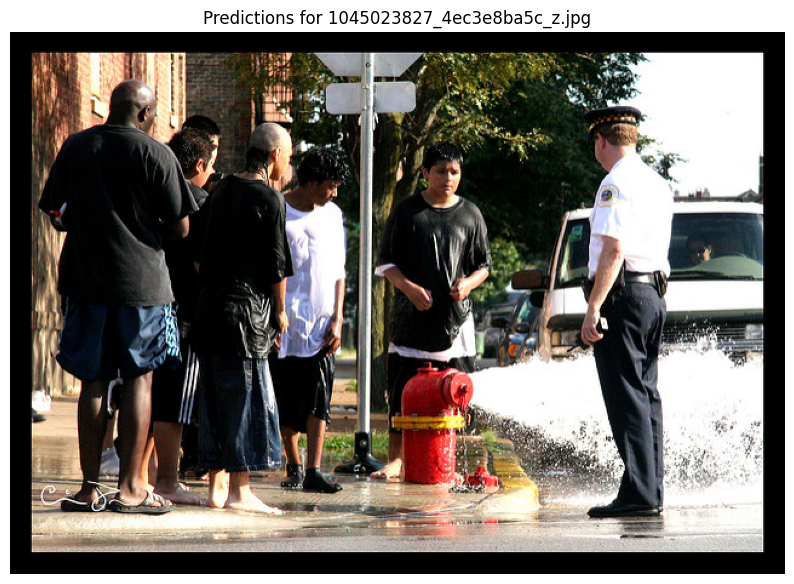

Processing: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/12283150_12d37e6389_z.jpg


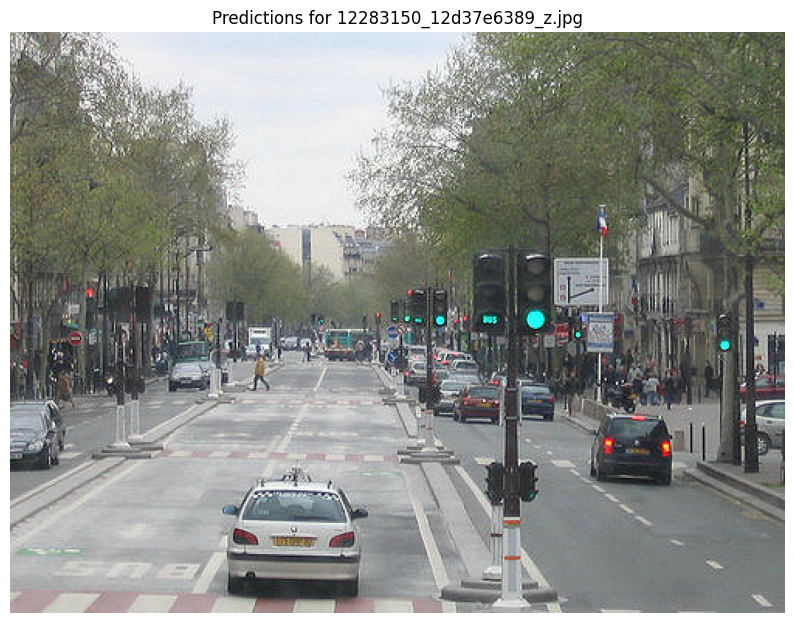

Processing: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/2383514521_1fc8d7b0de_z.jpg


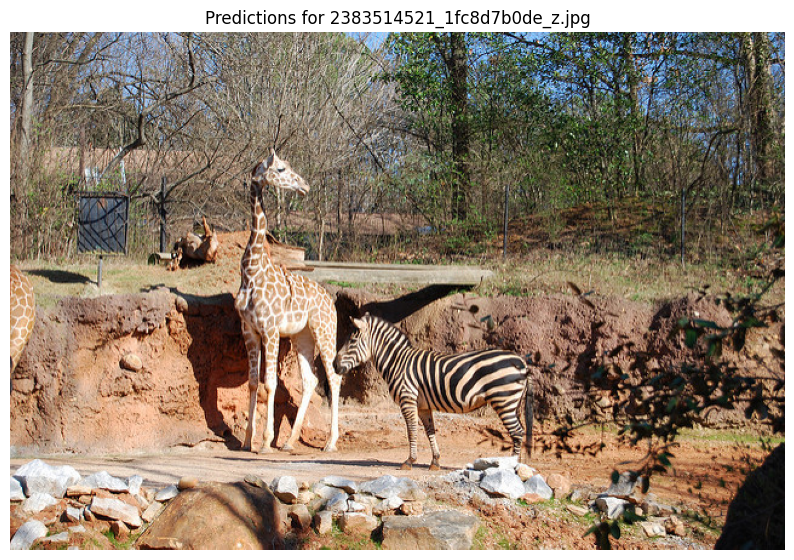

Processing: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/25691390_f9944f61b5_z.jpg


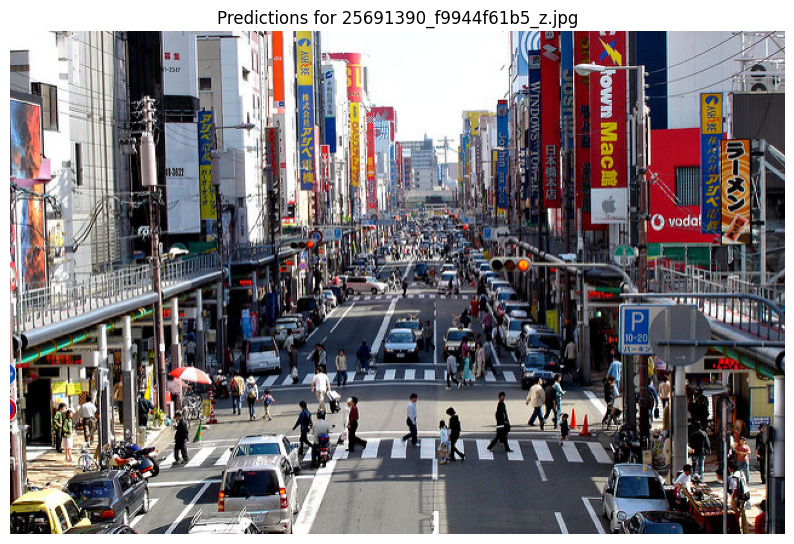

Processing: /content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/262985539_1709e54576_z.jpg


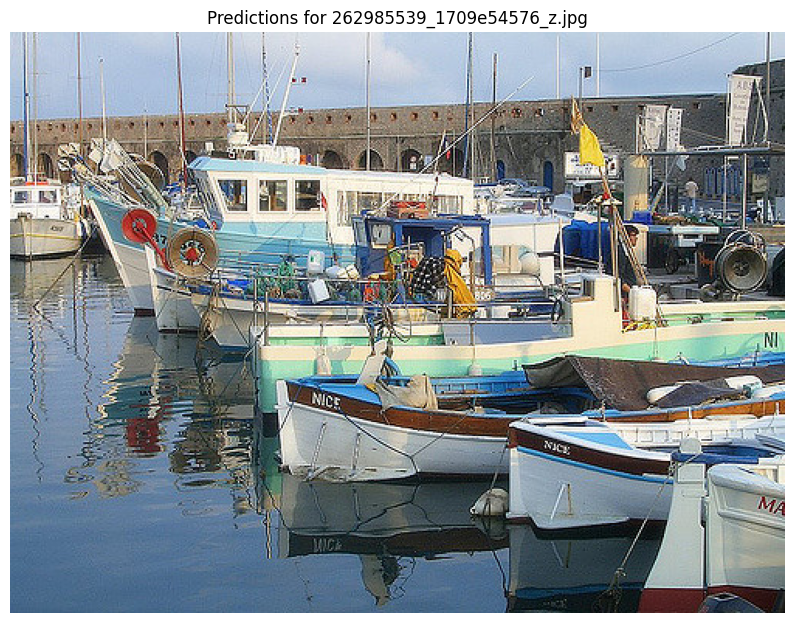

In [ ]:
# if __name__ == "__main__":
#     # Đường dẫn model
#     MODEL_PATH = '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/mask_rcnn_model.pth'

#     # Tải model đã huấn luyện
#     model = maskrcnn_resnet50_fpn(pretrained=False)
#     num_classes = 2  # Số lượng lớp (background + 1 class chính)
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
#     in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
#     hidden_layer = 256
#     model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

#     # Load weights
#     model.load_state_dict(torch.load(MODEL_PATH))

#     # Chuyển sang thiết bị GPU nếu có
#     device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#     model.to(device)

#     # Dự đoán trên 5 bức hình
#     image_paths = [
#         '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/1045023827_4ec3e8ba5c_z.jpg',
#         '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/12283150_12d37e6389_z.jpg',
#         '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/2383514521_1fc8d7b0de_z.jpg',
#         '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/25691390_f9944f61b5_z.jpg',
#         '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset/images_02/262985539_1709e54576_z.jpg'
#     ]

#     test_model(model, image_paths, device, threshold=0.5)


In [ ]:
# # Cài đặt các thư viện cần thiết
# import os
# import sys
# import random
# import math
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# import json
# import torch
# import torchvision
# from torchvision.models.detection import maskrcnn_resnet50_fpn
# from torchvision.transforms import functional as F
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
# from PIL import Image

# # [Rest of the code remains the same...]
# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, root_dir, transforms=None):
#         self.root_dir = root_dir
#         self.transforms = transforms
#         # Giả sử cấu trúc thư mục: root_dir/images và root_dir/annotations
#         self.imgs_dir = os.path.join(root_dir, "images") # images nam trong thu muc dataset
#         self.masks_dir = os.path.join(root_dir, "annotations") # annotations nam trong thu muc dataset
#         self.imgs = list(sorted(os.listdir(self.imgs_dir)))
#         self.masks = list(sorted(os.listdir(self.masks_dir)))

#     def __getitem__(self, idx):
#         # Load ảnh
#         img_path = os.path.join(self.imgs_dir, self.imgs[idx])
#         mask_path = os.path.join(self.masks_dir, self.masks[idx])
#         img = Image.open(img_path).convert("RGB")
#         mask = Image.open(mask_path)

#         # Chuyển mask thành numpy array
#         mask = np.array(mask)

#         # Nếu mask có nhiều channels, lấy channel đầu tiên
#         if len(mask.shape) == 3:
#             mask = mask[:, :, 0]  # Lấy channel đầu tiên
#         if mask.max() == 0:
#             print(f"Warning: Mask tại {mask_path} không chứa đối tượng nào.")

#         # Lấy instances khác nhau
#         obj_ids = np.unique(mask)
#         # Loại bỏ background (giả sử là 0)
#         obj_ids = obj_ids[1:]

#         # Tách các mask cho từng instance
#         masks = np.array([mask == obj_id for obj_id in obj_ids])

#         # Lấy bounding boxes
#         num_objs = len(obj_ids)
#         boxes = []
#         valid_masks = []
#         valid_obj_ids = []

#         for i in range(num_objs):
#             pos = np.where(masks[i])
#             if len(pos[0]) > 0:  # Kiểm tra xem mask có rỗng không
#                 xmin = np.min(pos[1])
#                 xmax = np.max(pos[1])
#                 ymin = np.min(pos[0])
#                 ymax = np.max(pos[0])

#                 # Kiểm tra xem box có kích thước hợp lệ không
#                 if (xmax > xmin) and (ymax > ymin):
#                     boxes.append([xmin, ymin, xmax, ymax])
#                     valid_masks.append(masks[i])
#                     valid_obj_ids.append(obj_ids[i])

#         # Cập nhật số lượng objects hợp lệ
#         num_objs = len(boxes)
#         masks = np.array(valid_masks) if valid_masks else np.zeros((0, mask.shape[0], mask.shape[1]))

#         # Chuyển đổi sang tensor
#         if num_objs > 0:
#             boxes = torch.as_tensor(boxes, dtype=torch.float32)
#             labels = torch.ones((num_objs,), dtype=torch.int64)
#             masks = torch.as_tensor(masks, dtype=torch.uint8)

#             image_id = torch.tensor([idx])
#             area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
#             iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
#         else:
#             # Trường hợp không có object nào hợp lệ
#             boxes = torch.zeros((0, 4), dtype=torch.float32)
#             labels = torch.zeros((0,), dtype=torch.int64)
#             masks = torch.zeros((0, mask.shape[0], mask.shape[1]), dtype=torch.uint8)
#             image_id = torch.tensor([idx])
#             area = torch.zeros((0,), dtype=torch.float32)
#             iscrowd = torch.zeros((0,), dtype=torch.int64)

#         target = {}
#         target["boxes"] = boxes
#         target["labels"] = labels
#         target["masks"] = masks
#         target["image_id"] = image_id
#         target["area"] = area
#         target["iscrowd"] = iscrowd

#         if self.transforms is not None:
#             img, target = self.transforms(img, target)

#         return img, target

#     def __len__(self):
#         return len(self.imgs)

# def get_transform():
#     transforms = []
#     # Chuyển đổi sang tensor
#     transforms.append(lambda x, target: (F.to_tensor(x), target))
#     return Compose(transforms)

# class Compose:
#     def __init__(self, transforms):
#         self.transforms = transforms

#     def __call__(self, image, target):
#         for t in self.transforms:
#             image, target = t(image, target)
#         return image, target

# def train_model():
#     # Khởi tạo model
#     model = maskrcnn_resnet50_fpn(pretrained=True)

#     # Thay đổi số lượng classes (ví dụ: background + 1 class)
#     num_classes = 2
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

#     # Thay đổi mask predictor
#     in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
#     hidden_layer = 256
#     model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
#                                                       hidden_layer,
#                                                       num_classes)

#     # Chuẩn bị dataset
#     dataset = CustomDataset('/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset', get_transform()) # de duong dan co dataset chua 2 thu muc images va annotations
#     data_loader = torch.utils.data.DataLoader(
#         dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)

#     # Chuyển model sang GPU nếu có
#     device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#     model.to(device)

#     # Khởi tạo optimizer
#     params = [p for p in model.parameters() if p.requires_grad]

#     optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

#     # Khởi tạo scheduler
#     lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

#     # Training loop
#     num_epochs = 10
#     for epoch in range(num_epochs):
#         model.train()
#         epoch_loss = 0
#         for images, targets in data_loader:
#             images = list(image.to(device) for image in images)
#             targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

#             loss_dict = model(images, targets)
#             losses = sum(loss for loss in loss_dict.values())

#             optimizer.zero_grad()
#             losses.backward()
#             optimizer.step()

#             epoch_loss += losses.item()

#         # Cập nhật scheduler
#         lr_scheduler.step()

#         print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(data_loader)}")

#     return model

#     # Thêm vào cuối vòng lặp training
#     with open('training_log.txt', 'a') as f:
#         f.write(f"Epoch {epoch+1}, Loss: {epoch_loss/len(data_loader):.4f}\n")


# def calculate_iou(box1, box2):
#     x1 = max(box1[0], box2[0])
#     y1 = max(box1[1], box2[1])
#     x2 = min(box1[2], box2[2])
#     y2 = min(box1[3], box2[3])

#     inter_area = max(0, x2 - x1) * max(0, y2 - y1)
#     box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
#     box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
#     union_area = box1_area + box2_area - inter_area

#     return inter_area / union_area if union_area != 0 else 0

# def evaluate_model(model, test_loader, iou_threshold=0.5):
#     model.eval()
#     total_iou = 0
#     total_predictions = 0

#     for images, targets in test_loader:
#         images = list(image.to(device) for image in images)
#         targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

#         with torch.no_grad():
#             predictions = model(images)

#         for pred, target in zip(predictions, targets):
#             pred_boxes = pred['boxes'].cpu().numpy()
#             gt_boxes = target['boxes'].cpu().numpy()

#             for pred_box in pred_boxes:
#                 for gt_box in gt_boxes:
#                     iou = calculate_iou(pred_box, gt_box)
#                     if iou > iou_threshold:
#                         total_iou += iou
#                         total_predictions += 1

#     avg_iou = total_iou / total_predictions if total_predictions > 0 else 0
#     print(f"Average IoU: {avg_iou:.4f}")

# def collate_fn(batch):
#     return tuple(zip(*batch))

# # Hàm để thực hiện dự đoán trên ảnh mới
# def predict(model, image_path, device):
#     model.eval()
#     img = Image.open(image_path).convert("RGB")
#     transform = get_transform()
#     img, _ = transform(img, None)
#     img = img.to(device)

#     with torch.no_grad():
#         prediction = model([img])

#     return prediction

# if __name__ == "__main__":
#     # Huấn luyện model
#     model = train_model()

#     # Lưu model
#     torch.save(model.state_dict(), '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/mask_rcnn_model.pth') #Luu model o thu muc tren Google Drive cua ban

#     # Đánh giá mô hình trên tập test
#     test_dataset = CustomDataset(
#         '/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/dataset',
#         get_transform()
#     )
#     test_loader = torch.utils.data.DataLoader(
#         test_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn
#     )
#     evaluate_model(model, test_loader)

Epoch 1/10, Loss: 1.402563914656639
Epoch 2/10, Loss: 0.6985311061143875
Epoch 3/10, Loss: 0.4279307648539543
Epoch 4/10, Loss: 0.3790621906518936
Epoch 5/10, Loss: 0.3412335589528084
Epoch 6/10, Loss: 0.3614225536584854
Epoch 7/10, Loss: 0.29259760305285454
Epoch 8/10, Loss: 0.2760290652513504
Epoch 9/10, Loss: 0.2739378400146961
Epoch 10/10, Loss: 0.2844609171152115
Average IoU: 0.6378


In [ ]:
# import torch
# import os
# from PIL import Image
# import matplotlib.pyplot as plt
# import numpy as np
# from torchvision.models.detection import maskrcnn_resnet50_fpn
# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
# from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
# from torchvision.transforms import functional as F

# def get_transform():
#     return lambda x: F.to_tensor(x)

# def get_model_instance_segmentation(num_classes):
#     # Tạo model giống như lúc training
#     model = maskrcnn_resnet50_fpn(pretrained=True)

#     # Cập nhật số classes cho box predictor
#     in_features = model.roi_heads.box_predictor.cls_score.in_features
#     model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

#     # Cập nhật số classes cho mask predictor
#     in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
#     hidden_layer = 256
#     model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
#                                                       hidden_layer,
#                                                       num_classes)
#     return model

# def test_dataset_images(model_path, images_dir, output_dir):
#     # Tạo thư mục output
#     os.makedirs(output_dir, exist_ok=True)

#     # Thiết lập device
#     device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#     print(f"Sử dụng device: {device}")

#     # Tải model
#     model = get_model_instance_segmentation(num_classes=2)
#     model.load_state_dict(torch.load(model_path, map_location=device))
#     model.to(device)
#     model.eval()
#     print("Đã tải model thành công")

#     # Chuẩn bị transform
#     transform = get_transform()

#     # Lấy danh sách ảnh
#     images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
#     print(f"Tìm thấy {len(images)} ảnh để test")

#     # Xử lý từng ảnh
#     for img_name in images:
#         print(f"\nĐang xử lý ảnh: {img_name}")
#         img_path = os.path.join(images_dir, img_name)

#         # Đọc và transform ảnh
#         image = Image.open(img_path).convert("RGB")
#         image_tensor = transform(image)

#         # Dự đoán
#         with torch.no_grad():
#             prediction = model([image_tensor.to(device)])

#         # Lấy kết quả
#         boxes = prediction[0]['boxes'].cpu()
#         scores = prediction[0]['scores'].cpu()
#         masks = prediction[0]['masks'].cpu()
#         labels = prediction[0]['labels'].cpu()  # Lấy nhãn

#         # Gắn nhãn (cập nhật danh sách nhãn tùy thuộc vào dataset của bạn)
#         class_labels = ["background", "object_name"]  # Thay "object_name" bằng tên lớp thực tế

#         # Lọc prediction có độ tin cậy cao
#         confidence_threshold = 0.5
#         high_conf_indices = scores > confidence_threshold
#         boxes = boxes[high_conf_indices]
#         scores = scores[high_conf_indices]
#         masks = masks[high_conf_indices]

#         # Vẽ kết quả
#         plt.figure(figsize=(20, 10))

#         # Ảnh gốc
#         plt.subplot(1, 2, 1)
#         plt.imshow(image)
#         plt.title('Ảnh gốc', fontsize=13)
#         plt.axis('off')

#         # Ảnh với predictions
#         plt.subplot(1, 2, 2)
#         image_np = np.array(image)
#         plt.imshow(image_np)

#         detected_objects = len(boxes)
#         plt.title(f'Dự đoán (Phát hiện {detected_objects} đối tượng)', fontsize=13)

#         for box, mask, score, label in zip(boxes, masks, scores, labels):
#             box = box.numpy()
#             label_text = class_labels[label]  # Lấy nhãn từ danh sách

#             # Vẽ bounding box
#             plt.gca().add_patch(plt.Rectangle(
#                 (box[0], box[1]),
#                 box[2] - box[0],
#                 box[3] - box[1],
#                 fill=False,
#                 color='red',
#                 linewidth=2
#             ))

#             # Vẽ mask
#             mask = mask.squeeze().numpy() > 0.5
#             image_np = np.array(image)
#             image_np[mask] = image_np[mask] * 0.7 + np.array([255, 0, 0]) * 0.3
#             plt.imshow(image_np, alpha=0.5)

#             # Hiển thị nhãn và điểm số
#             plt.text(
#                 box[0], box[1] - 10,
#                 f'{label_text}: {score:.2f}',
#                 color='white',
#                 bbox=dict(facecolor='red', alpha=0.7),
#                 fontsize=10
#             )

#         plt.axis('off')

#         # Lưu kết quả
#         output_path = os.path.join(output_dir, f'result_{img_name}')
#         plt.savefig(output_path, bbox_inches='tight', dpi=200)
#         plt.close()

#         print(f"Đã phát hiện {detected_objects} đối tượng trong ảnh {img_name}")

# # Đường dẫn
# model_path = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/mask_rcnn_model.pth" # Duong dan luu model da train xong
# images_dir = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/R-CNN/Mask_RCNN/images" # thu muc images chua 7 anh de test model
# output_dir = "/content/drive/MyDrive/10%_Of_Progress2_ComputerVision/MaskRCNN/test_results02" # thu muc test_results chua ket qua thu nghiem cua Mask R-CNN

# # Chạy test
# test_dataset_images(model_path, images_dir, output_dir)

Sử dụng device: cpu


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-13-48e0d65becac>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-m

Đã tải model thành công
Tìm thấy 29 ảnh để test

Đang xử lý ảnh: 2516944023_d00345997d_z.jpg
Đã phát hiện 18 đối tượng trong ảnh 2516944023_d00345997d_z.jpg

Đang xử lý ảnh: 7933423348_c30bd9bd4e_z.jpg
Đã phát hiện 15 đối tượng trong ảnh 7933423348_c30bd9bd4e_z.jpg

Đang xử lý ảnh: 4782628554_668bc31826_z.jpg
Đã phát hiện 19 đối tượng trong ảnh 4782628554_668bc31826_z.jpg

Đang xử lý ảnh: 8734543718_37f6b8bd45_z.jpg
Đã phát hiện 22 đối tượng trong ảnh 8734543718_37f6b8bd45_z.jpg

Đang xử lý ảnh: 9118579087_f9ffa19e63_z.jpg
Đã phát hiện 11 đối tượng trong ảnh 9118579087_f9ffa19e63_z.jpg

Đang xử lý ảnh: 8239308689_efa6c11b08_z.jpg
Đã phát hiện 19 đối tượng trong ảnh 8239308689_efa6c11b08_z.jpg

Đang xử lý ảnh: 3862500489_6fd195d183_z.jpg
Đã phát hiện 17 đối tượng trong ảnh 3862500489_6fd195d183_z.jpg

Đang xử lý ảnh: 8433365521_9252889f9a_z.jpg
Đã phát hiện 16 đối tượng trong ảnh 8433365521_9252889f9a_z.jpg

Đang xử lý ảnh: 1045023827_4ec3e8ba5c_z.jpg
Đã phát hiện 12 đối tượng trong ảnh